In [ ]:
!pip -q install yellowbrick==1.3
!pip -q install kneed
!pip install plotly
!pip -q install factor_analyzer
!pip install -U imbalanced-learn

     |████████████████████████████████| 271 kB 8.5 MB/s 
     |████████████████████████████████| 14.8 MB 50.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
cmdstanpy 1.0.4 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 448 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 8.3 MB/s 
     |████████████████████████████████| 199 kB 57.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Foun

In [ ]:
# See https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# Code to read csv file into Colaboratory:
!pip -q install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1Wz8kY4REOgFpzyKixGfWXle9K4tkSths'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ai4i2020.csv')  
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #For plotting
from sklearn.cluster import KMeans #Do K-Means clustering
from sklearn.metrics import silhouette_score #Calculate score of silhouette for each K
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
pd.set_option("display.max_rows", None, "display.max_columns", None)
import math
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import plotly.express as px
from yellowbrick.features import PCA as YBPCA
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from kneed import KneeLocator #Find the knee of the WCSS vs K plot
from yellowbrick.cluster import silhouette_visualizer #Plot Silhouette plot
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab' 
from imblearn.over_sampling import SMOTENC
from decimal import Decimal

# Data analysis part 1

In [ ]:
df = pd.read_csv('ai4i2020.csv')

In [ ]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [ ]:
df['Type'] = df['Type'].astype('category')

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
# rename columns
df = df.rename(columns={'Product ID':'Product_ID', 'Air temperature [K]':'Air_temperature_K', 'Process temperature [K]':'Process_temperature_K', 
                   'Rotational speed [rpm]':'Rotational_speed_rpm', 'Torque [Nm]':'Torque_Nm', 'Tool wear [min]':'Tool_wear_min', 
                   'Machine failure':'Machine_failure'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   UDI                    10000 non-null  int64   
 1   Product_ID             10000 non-null  object  
 2   Type                   10000 non-null  category
 3   Air_temperature_K      10000 non-null  float64 
 4   Process_temperature_K  10000 non-null  float64 
 5   Rotational_speed_rpm   10000 non-null  int64   
 6   Torque_Nm              10000 non-null  float64 
 7   Tool_wear_min          10000 non-null  int64   
 8   Machine_failure        10000 non-null  int64   
 9   TWF                    10000 non-null  int64   
 10  HDF                    10000 non-null  int64   
 11  PWF                    10000 non-null  int64   
 12  OSF                    10000 non-null  int64   
 13  RNF                    10000 non-null  int64   
dtypes: category(1), float64(3), int64(9), o

In [ ]:
df.describe()

UDI  Air_temperature_K  Process_temperature_K  \
count  10000.00000       10000.000000           10000.000000   
mean    5000.50000         300.004930             310.005560   
std     2886.89568           2.000259               1.483734   
min        1.00000         295.300000             305.700000   
25%     2500.75000         298.300000             308.800000   
50%     5000.50000         300.100000             310.100000   
75%     7500.25000         301.500000             311.100000   
max    10000.00000         304.500000             313.800000   

       Rotational_speed_rpm     Torque_Nm  Tool_wear_min  Machine_failure  \
count          10000.000000  10000.000000   10000.000000     10000.000000   
mean            1538.776100     39.986910     107.951000         0.033900   
std              179.284096      9.968934      63.654147         0.180981   
min             1168.000000      3.800000       0.000000         0.000000   
25%             1423.000000     33.200000      53.000000         0.000000   
50%             1503.000000     40.100000     108.000000         0.000000   
75%             1612.000000     46.800000     162.000000         0.000000   
max             2886.000000     76.600000     253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

Text(1, 402, '339')

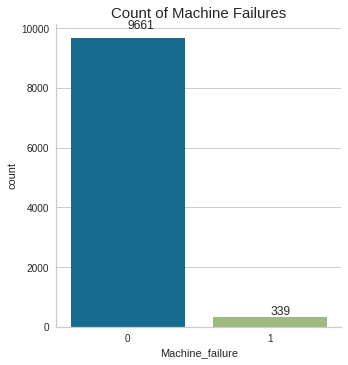

In [ ]:
# check distribution of Machine Failures
g = sns.catplot(data=df, x='Machine_failure', kind='count')
g.ax.set_title("Count of Machine Failures", size=15)
g.ax.text(0, 10000, str(df[df['Machine_failure']==0]['Machine_failure'].count()))
g.ax.text(1, 402, str(df[df['Machine_failure']==1]['Machine_failure'].count()))

Text(0.5, 1.0, 'Type of Machine Failures')

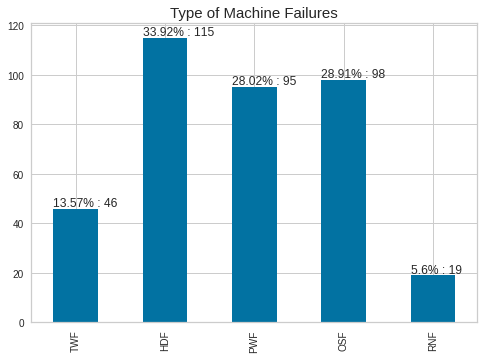

In [ ]:
# Count the number of machines that failed for each type of failure
count_plt = df[["TWF", "HDF", "PWF", "OSF", "RNF"]].sum().plot.bar()
for p in count_plt.patches:
    count_plt.annotate(str(round(p.get_height() / 339 * 100, 2)) + "% : " + str(p.get_height()), (p.get_x(), p.get_height()+1))
count_plt.set_title("Type of Machine Failures", size=15)

In [ ]:
df = df.drop(columns=['UDI', 'Product_ID', 'TWF', 'HDF', 'PWF','OSF', 'RNF'])

NameError: ignored

Text(0.5, 2.25, 'Boxplot of machine features between functioning and failing machines')

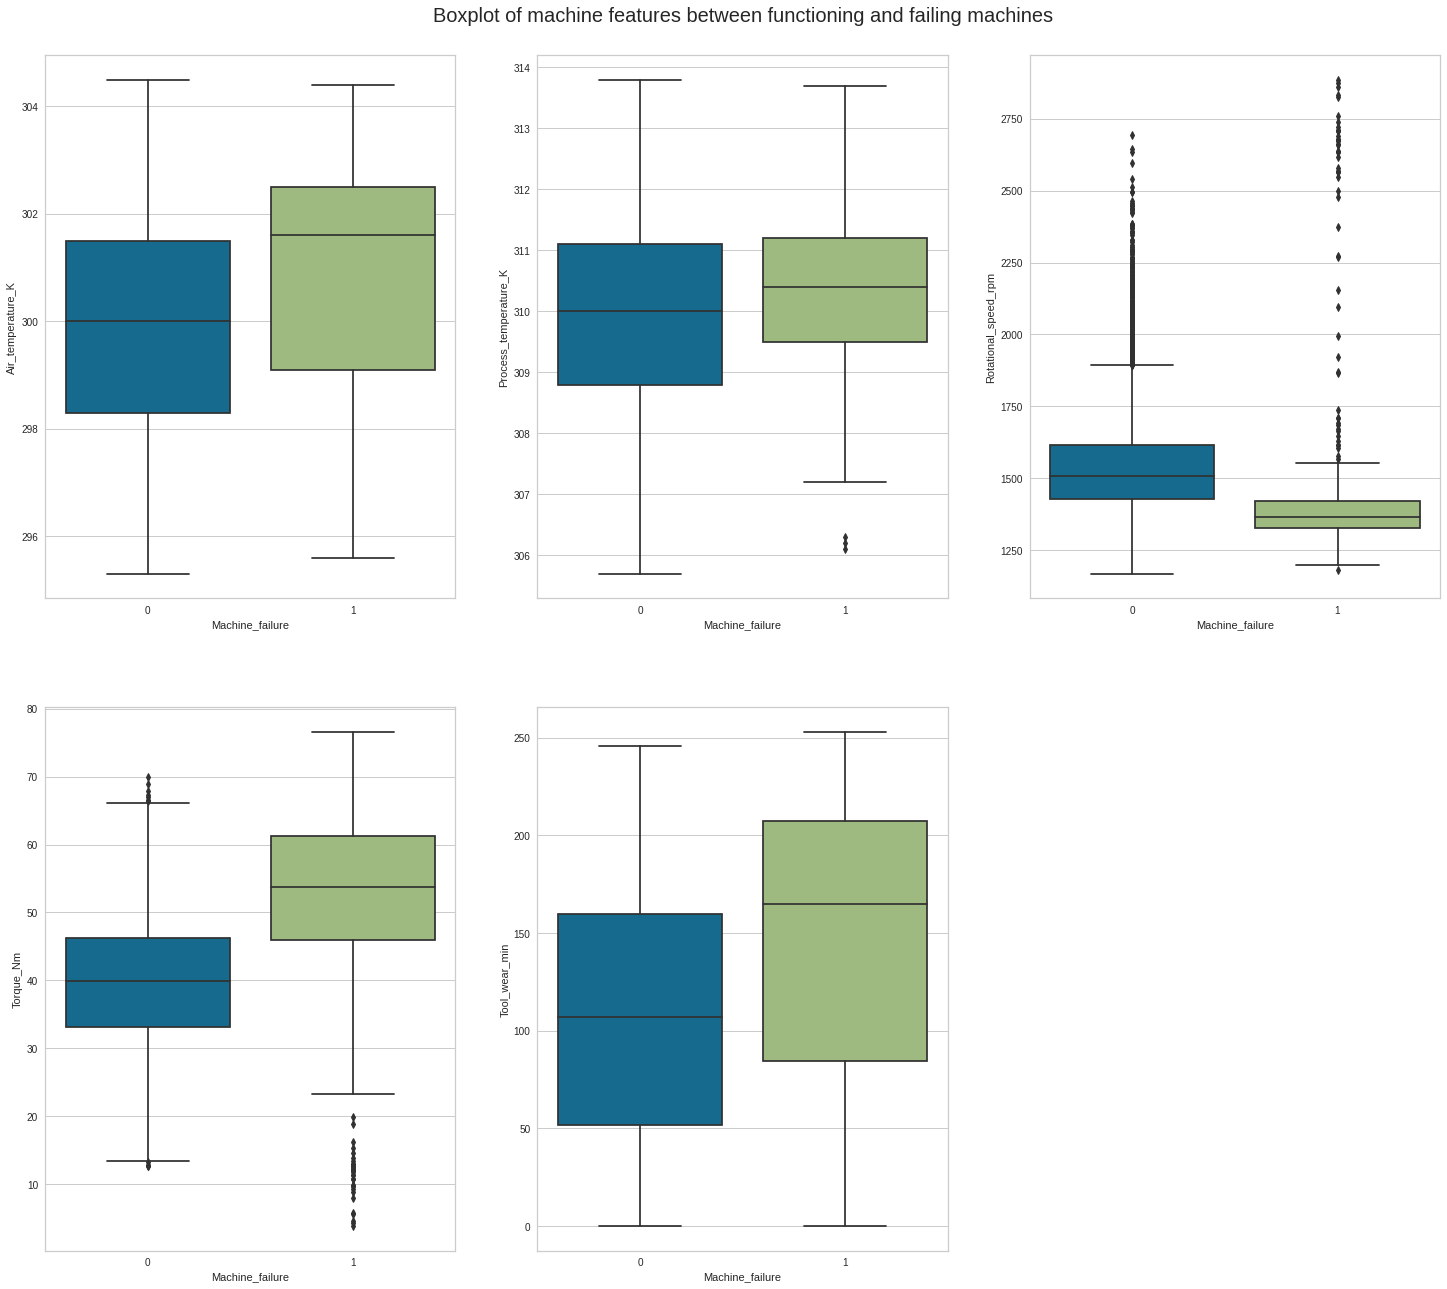

In [ ]:
# get boxplot of features between functioning and failing machines
attr = ["Air_temperature_K","Process_temperature_K","Rotational_speed_rpm","Torque_Nm","Tool_wear_min"]
j=1
plt.figure(figsize=(25,22))
for i in attr:
  plt.subplot(2,3,j)
  sns.boxplot(x="Machine_failure",y=i,data=df)
  j+=1
plt.title("Boxplot of machine features between functioning and failing machines",y=2.25, fontsize=20)

Text(0.5, 2.25, 'Boxplot of failing machine features between machine types')

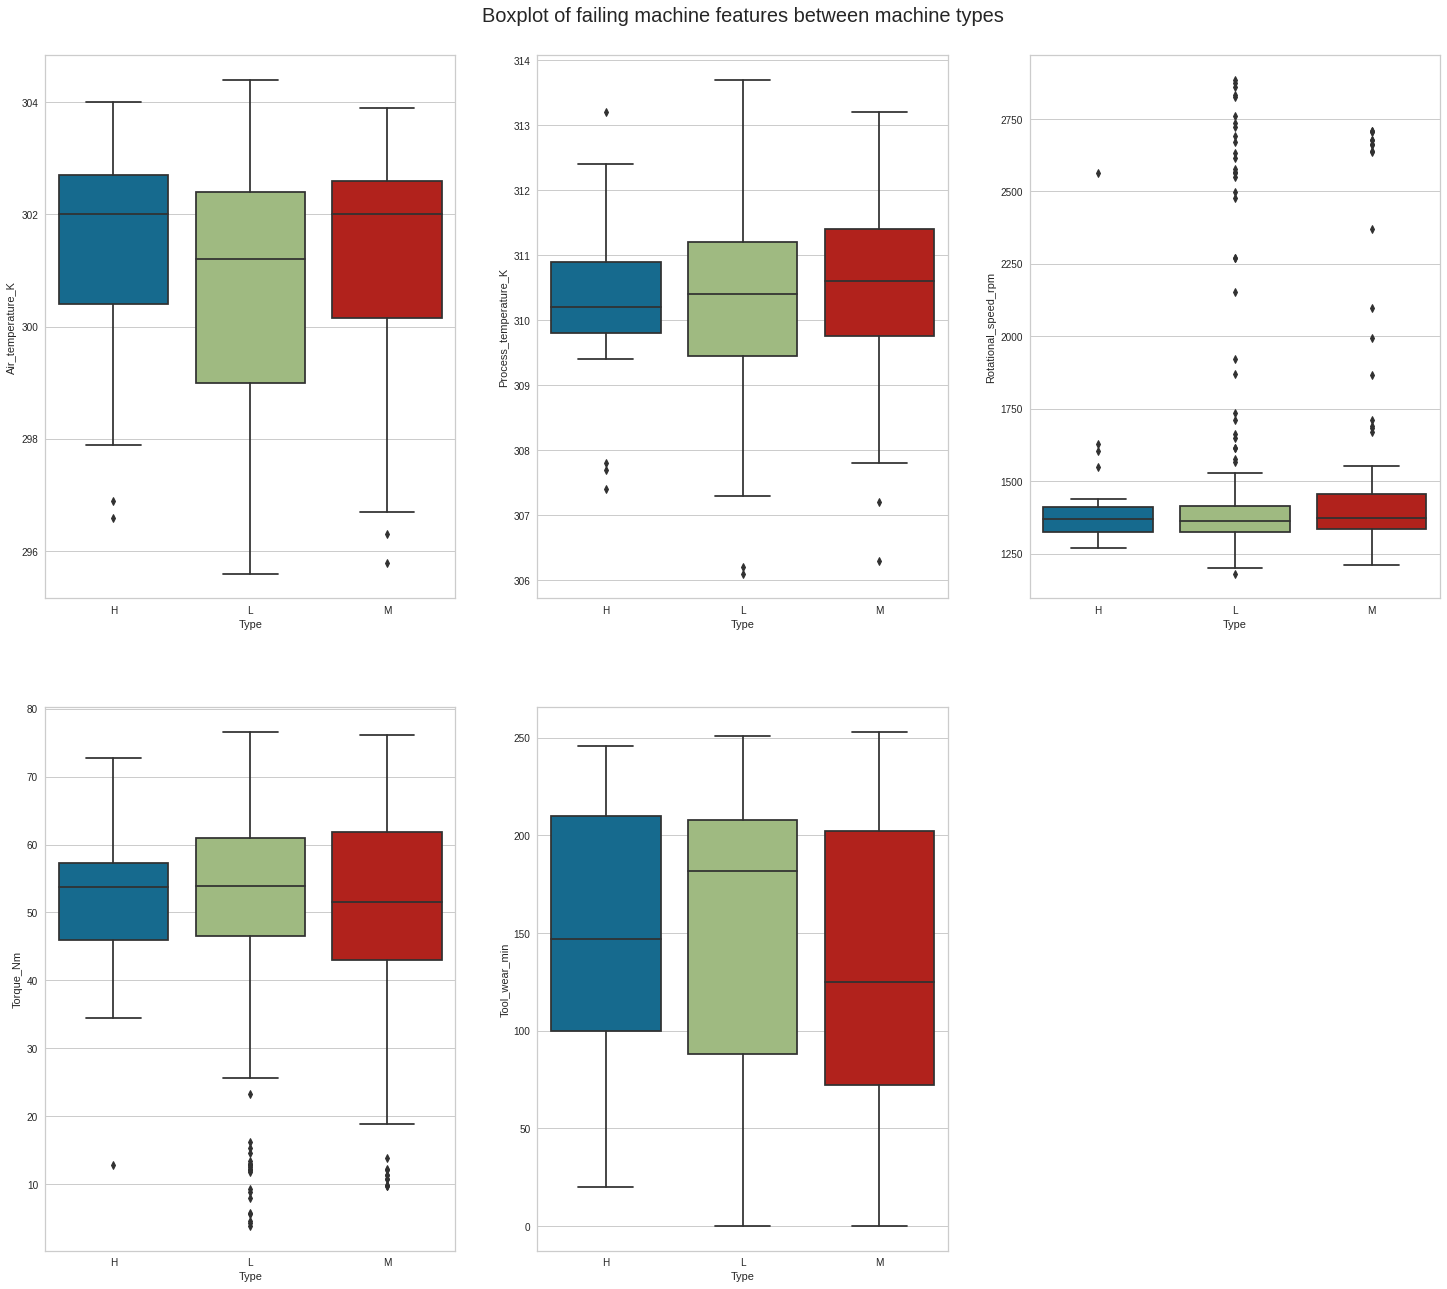

In [ ]:
# get boxplot of machine features between machine types
fails = df[df["Machine_failure"]==1] # get only machine failure data
plt.figure(figsize=(25,22))
j=1
for i in attr:
  plt.subplot(2,3,j)
  sns.boxplot(x="Type",y=i,data=fails)
  j+=1 
plt.title("Boxplot of failing machine features between machine types",y=2.25, fontsize=20)

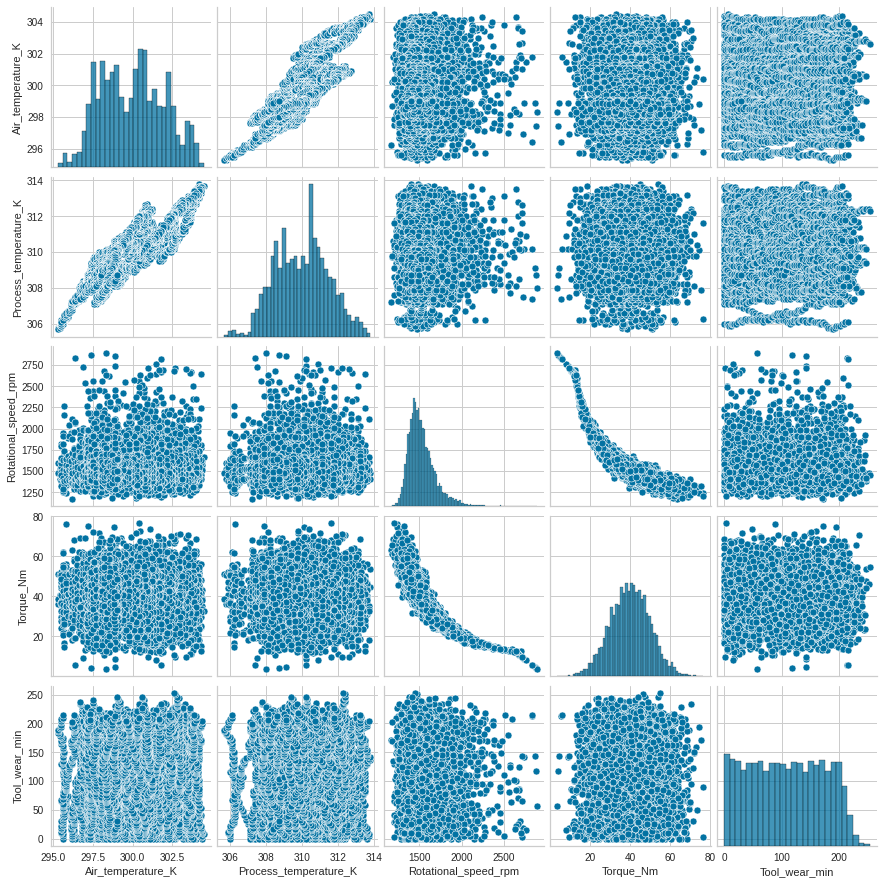

In [ ]:
# correlation matrix
df_continuous = df.drop(columns=['Machine_failure', 'Type']) 
sns.pairplot(df_continuous)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of machine types')

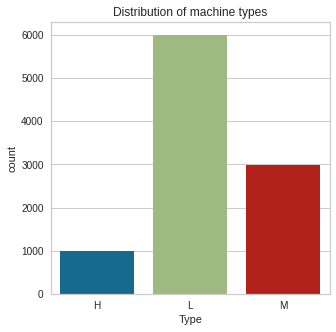

In [ ]:
# get distribution of machine types
plt.figure(figsize=(5, 5))
sns.countplot(df['Type'])
plt.title('Distribution of machine types')

Text(0.5, 1.0, 'Failure ratio by machine type')

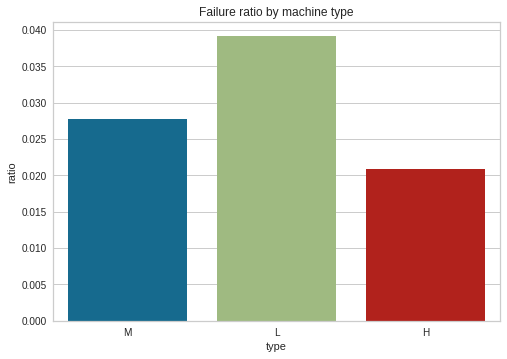

In [ ]:
# get failure ratio by machine type
dic ={}
for t in ["M","L","H"]:
  length = sum(df["Type"]==t)
  variant = df[df["Type"]==t]
  fails = sum(variant["Machine_failure"]==1)
  ratio = fails/length
  dic[t]=ratio
dic = pd.DataFrame(dic,index=[1])
dic = dic.melt().rename({"variable":"type","value":"ratio"},axis=1)
sns.barplot(x='type',y='ratio',data=dic).set_title("Failure ratio by machine type")

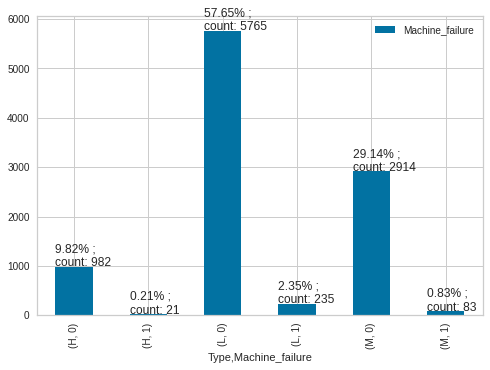

In [ ]:
# Machine failure according to the type of machine
# sanity check for plot above
temp = df.groupby(["Type", "Machine_failure"])["Machine_failure"].count()
temp1 = pd.DataFrame(temp)
count_plt = temp1.plot.bar()
data_size = len(df["Machine_failure"])

for p in count_plt.patches:
    count_plt.annotate(str(round(p.get_height() / data_size * 100, 2)) + "% ; \ncount: " + str(p.get_height()), (p.get_x(), p.get_height() + 15))

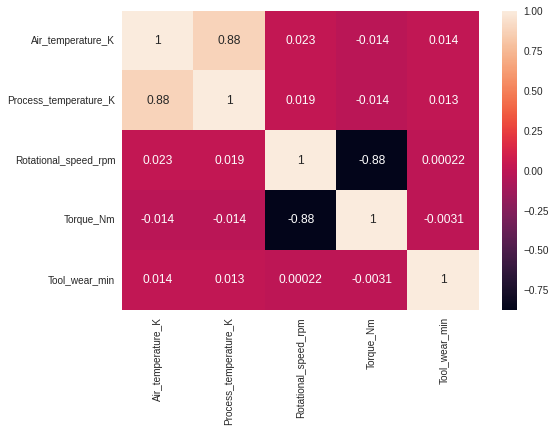

In [ ]:
corrMatrix = df_continuous.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

From the above plots, we can see that the there is a strong postive linear relationship between Process temperature and Air temperature and strong negative relationship between Torque and Rotational speed. On the other hand, there exists weak linear relationships between variables such as between Rotational speed and Air temperature.

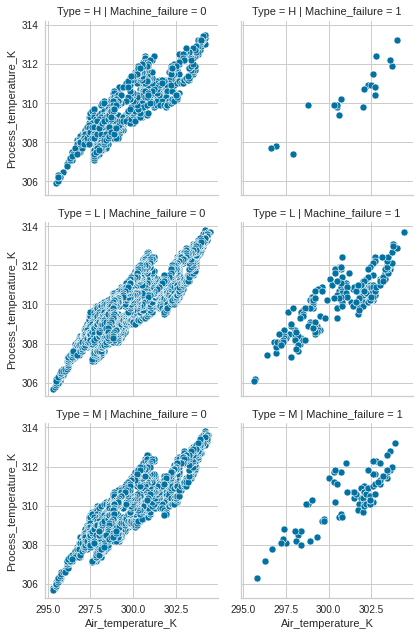

In [ ]:
# Plots to investigate the relationship between Process Temperature and Air Temperature on Type and Machine Failure
g = sns.FacetGrid(df, col="Machine_failure", row = "Type")
g.map(sns.scatterplot, "Air_temperature_K", "Process_temperature_K")

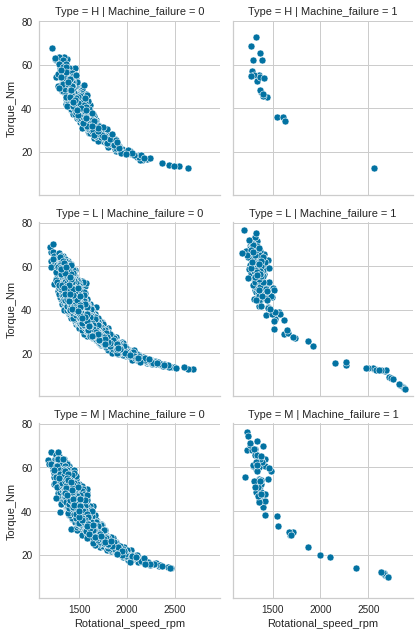

In [ ]:
# Plots to investigate the relationship between Torque and Rotational Speed on Type and Machine Failure
g = sns.FacetGrid(df, col = "Machine_failure", row = "Type")
g.map(sns.scatterplot, "Rotational_speed_rpm", "Torque_Nm")

# Data pre-processing

## Splitting of data

In [ ]:
#training: 70%
#testing: 30%
y = df['Machine_failure']
X = df.drop(columns=['Machine_failure'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111) #for reproducibility

X_test.head()

Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
8768    M              297.5                  308.7                  1363   
5467    L              302.9                  312.4                  1383   
2683    L              299.8                  309.5                  1590   
4357    L              302.0                  309.9                  1407   
666     L              297.5                  309.0                  1470   

      Torque_Nm  Tool_wear_min  
8768       53.6            194  
5467       51.4            160  
2683       28.5             23  
4357       52.8            154  
666        43.5            191

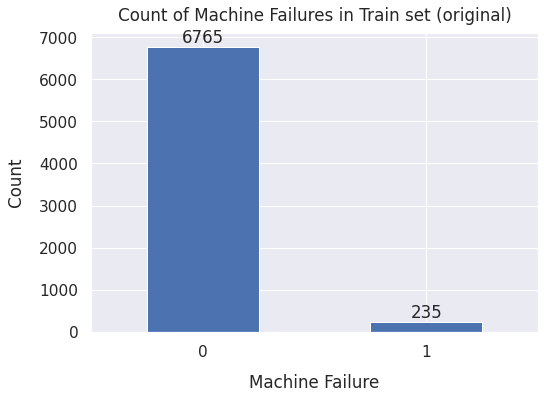

In [ ]:
sns.set(font_scale=1.4)
y_train.value_counts().plot(kind='bar')
plt.xlabel("Machine Failure", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Machine Failures in Train set (original)", y=1.02);
plt.xticks(rotation='horizontal')

n = [0,1]
s = y_train.value_counts()
for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')

## SMOTE

Based on bargraph (Fig.1), there is dataset imbalance, with about 3.5% of the product ids are classified as failure. We will use SMOTE technique to apply oversampling on minority class on the training data.

In [ ]:
smote_nc = SMOTENC(random_state=111, categorical_features=[0])
X_train, y_train =  smote_nc.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    6765
0    6765
Name: Machine_failure, dtype: int64

In [ ]:
y_test.value_counts()

0    2896
1     104
Name: Machine_failure, dtype: int64

Now, we will have about 81% training data and 19% testing data after oversampling is done.




## One hot-encoding
Since 'Type' is a categorical variable, we will first apply one-hot encoding on variable 'Type'

In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=['Type'], prefix='Type')
X_test_encoded = pd.get_dummies(X_test, columns=['Type'], prefix='Type')

## Scaling 

A common procedure is to centre each variable by subtracting its mean from every observation, and then rescale those centred values as units of standard deviation. This is commonly called standardizing, normalizing, or Z scoring the data.

In [ ]:
def scaling(df):
  colnames = list(df.columns)
  dataarray = df.to_numpy()
  scaler = StandardScaler()
  scaled_features = pd.DataFrame(scaler.fit_transform(dataarray))
  scaled_features.columns = colnames
  return scaled_features

In [ ]:
X_train_scaled = scaling(X_train_encoded)
X_test_scaled = scaling(X_test_encoded)

In [ ]:
def concatentate_df(X_train, y_train, X_test, y_test):
  train_set = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
  test_set = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
  df = pd.concat([train_set, test_set], axis=0)
  return df

In [ ]:
df_scaled = concatentate_df(X_train_scaled, y_train, X_test_scaled, y_test)

# Data analysis part 2

Since we applied oversampling and scaling to the minority class, we will analysis the new data

In [ ]:
print("Number of data points:", len(df_scaled))
df_scaled.head()

Number of data points: 16530


Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  Torque_Nm  \
0           0.918790               0.991710             -0.449359   0.202166   
1          -1.134857              -0.505564              0.072251   0.388423   
2           0.148673               0.767119              0.302964  -0.858064   
3          -0.364739              -0.655292             -0.743601   1.477308   
4           0.610743               0.317937              0.343088  -0.714790   

   Tool_wear_min    Type_H    Type_L    Type_M  Machine_failure  
0      -1.722817 -0.232169  0.634321 -0.555437                0  
1       1.039851 -0.232169 -1.576489  1.800383                0  
2       0.254524  4.307206 -1.576489 -0.555437                0  
3       1.222159 -0.232169  0.634321 -0.555437                1  
4       1.278254 -0.232169  0.634321 -0.555437                0

The barplot shows that the dataset is much more balanced now. We have about 42% classified as machine failure.

Text(1, 7000, '6869')

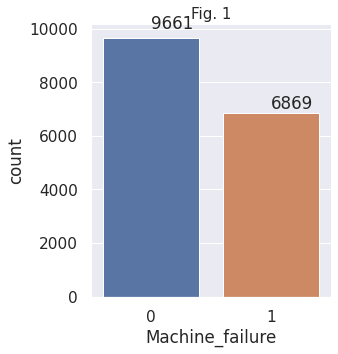

In [ ]:
g = sns.catplot(data=df_scaled, x='Machine_failure', kind='count')
g.ax.set_title("Fig. 1", size=15)
g.ax.text(0, 10000, str(df_scaled[df_scaled['Machine_failure']==0]['Machine_failure'].count()))
g.ax.text(1, 7000, str(df_scaled[df_scaled['Machine_failure']==1]['Machine_failure'].count()))

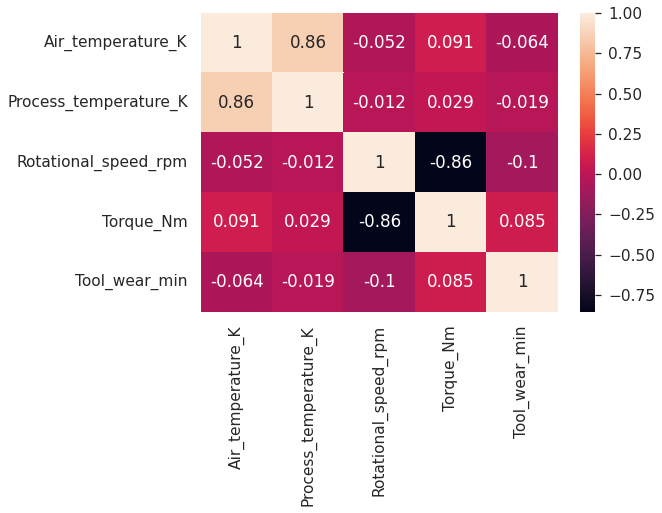

In [ ]:
# correlation matrix of data after smote
df_fails = df_scaled["Machine_failure"] # keep machine status
df_scaled_continuous = df_scaled.drop(columns=['Machine_failure', 'Type_H', 'Type_L', 'Type_M'])
corrMatrix = df_scaled_continuous.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

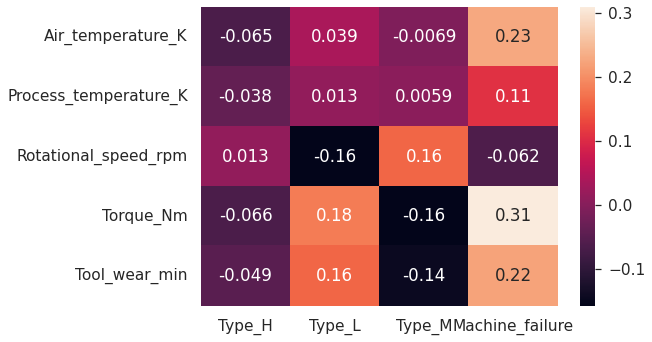

In [ ]:
# point-biserial correlation: for continuous VS categorial variables
cat_var = ['Type_H', 'Type_L', 'Type_M', 'Machine_failure']
conti_var = ['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min']
nest = []
for var_a in conti_var:
  lst = []
  for var_b in cat_var:
    r, p_val = pointbiserialr(df_scaled[var_b], df_scaled[var_a])
    lst += [r,]
  nest += [lst,]

plt_df = pd.DataFrame(nest, conti_var)
plt_df.columns = cat_var
sns.heatmap(plt_df, annot = True)

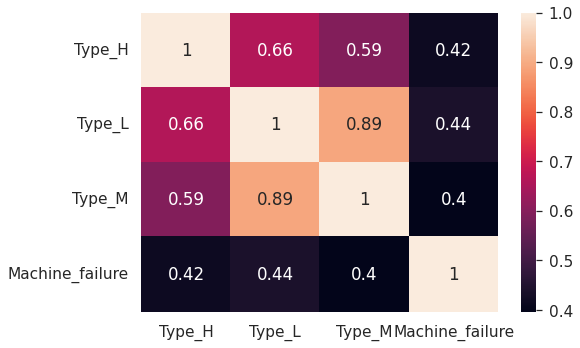

In [ ]:
# Find Cramer's V correlation
#total_len = len(categorical_variables)
from scipy.stats import chi2_contingency

nest = []
for var_a in cat_var:
  lst = []
  for var_b in cat_var: 
    c_matrix = pd.crosstab(df_scaled[var_a], df_scaled[var_b])

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(c_matrix)[0]
    n = c_matrix.sum().sum()
    phi2 = chi2/n
    r,k = c_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    lst += [corr,]
    #print(var_a, " - ", var_b, ": ", corr)
  nest += [lst,]

plt_df = pd.DataFrame(nest, cat_var)
plt_df.columns = cat_var
sns.heatmap(plt_df, annot = True)

# PCA

Since the KMO score is < 0.5, it shows that the data is not suitable for PCA 



In [ ]:
df_pca = df_scaled.drop(columns={'Machine_failure'})
# Bartlett's Sphericity Test
_ , p_value = calculate_bartlett_sphericity(df_pca)
print("Bartlett's Sphericity Test: " , p_value)

_, kmo_score = calculate_kmo(df_pca)
print("KMO Score: ", kmo_score) 

Bartlett's Sphericity Test:  0.0
KMO Score:  0.3643759837488259


# K Means

## Choosing number of clusters

In [ ]:
df_kmeans = df_scaled.drop(columns=["Machine_failure"])

In [ ]:
kmeans_arr = df_kmeans.to_numpy()

In [ ]:
# Elbow method with Total WCSS vs Number of Clusters
wcss = []
max_k =  8
kmeans_kwargs = {"init" : "random",
                 "n_init" : 10,
                 "max_iter" : 300,
                 "random_state" : 42,}

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(kmeans_arr)
    wcss.append(kmeans.inertia_)

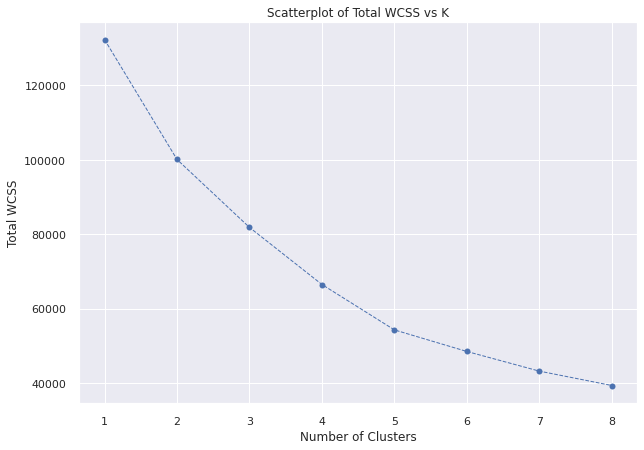

In [ ]:
sns.set(font_scale = 1)
plt.figure(figsize=(10, 7)) 
plt.plot(range(1, max_k+1), wcss,linestyle='--', marker='o', color='b',linewidth=1)
plt.xticks(range(1, max_k+1))
plt.title('Scatterplot of Total WCSS vs K')
plt.xlabel("Number of Clusters")
plt.ylabel("Total WCSS")
plt.show()

In [ ]:
#To locate the elbow point of the curve using kneed package
kl = KneeLocator(range(1, max_k+1), wcss, curve="convex", direction="decreasing")

kl.elbow

4

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Start at 2 clusters for silhouette coefficient
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(kmeans_arr)
    score = silhouette_score(kmeans_arr, kmeans.labels_,metric = 'euclidean')
    silhouette_coefficients.append(score)

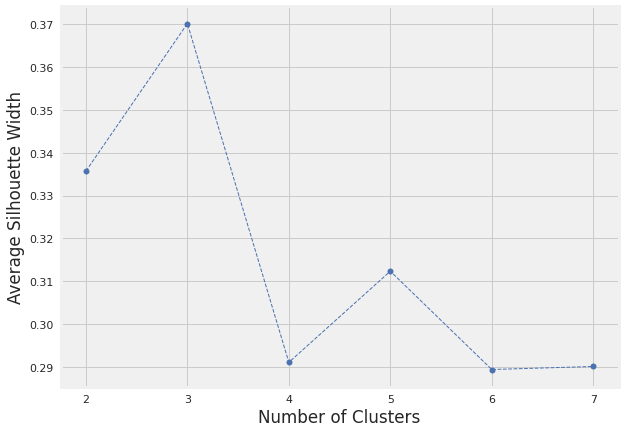

In [ ]:
plt.figure(figsize=(10, 7)) 
plt.style.use("fivethirtyeight")
plt.plot(range(2, max_k), silhouette_coefficients,linestyle='--', marker='o', color='b',linewidth=1)
plt.xticks(range(2, max_k))
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Width")
plt.show()

In [ ]:
#silhouette dictionary to track the silhouette scores for different k 
silhouette_dict = {}

In [ ]:
#Fit kmeans labels onto our dataframe
#Input: df and int, Output:df 
def kmeans_label(data, num_clusters): 
  kmeans_model = KMeans(init = 'random', n_clusters = num_clusters, random_state=42)
  kmeans_model.fit(data.to_numpy())
  data2 = data.copy()
  labels = kmeans_model.labels_
  data2['Clusters'] = pd.DataFrame(labels)
  return data2

In [ ]:
#Plot boxplots of each feature after attaching cluster label in each row
#Input: df with labels, Output: plt graphs
def plot_boxplots(data_with_label):
  plt.figure(figsize=(30,30))
  sns.set(font_scale = 2)
  for i in range(len(data_with_label.columns)-1):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=data_with_label.columns[i], x='Clusters', data=data_with_label, palette="colorblind") 


In [ ]:
#Plot the silhouettes
#Input: df, Output: plt graphs
def plot_silhouettes(data,num_clusters):
  dataarray = data.to_numpy()
  model = KMeans(num_clusters,random_state=42)
  plt.figure(figsize=(10, 7)) 
  sns.set(font_scale = 1)
  silhouette_visualizer(model, dataarray, colors='yellowbrick')
  score = silhouette_score(dataarray, model.labels_,metric = 'euclidean')
  if num_clusters not in silhouette_dict.keys():
    silhouette_dict[num_clusters] = score
  print("For n_clusters = {0} The average silhouette_score is: {1} ".format(num_clusters,score))


In [ ]:
#kmeans with 5 clusters
kmeans5 = KMeans(init="random",n_clusters = 5, random_state = 42)
kmeans5.fit(kmeans_arr)
clustergroups5 = kmeans5.labels_ #The cluster number for each row

In [ ]:
Clustercenters5 = pd.DataFrame(kmeans5.cluster_centers_) #Dataframe of cluster centers

In [ ]:
Clustercenters5.rename(columns={0: 'Air_temperature_K', 1: 'Process_temperature_K',
       2:'Rotational speed_rpm_', 3:'Torque_Nm', 4:'Tool wear_min', 5:'Type_H', 6:'Type_L', 7:'Type_M'})


Air_temperature_K  Process_temperature_K  Rotational speed_rpm_  Torque_Nm  \
0          -0.057914              -0.030703              -0.113177  -0.028631   
1          -0.941499              -0.893496              -0.121817   0.037879   
2          -0.242749              -0.141725               0.015304  -0.227475   
3           0.137389               0.121997               3.346548  -2.275139   
4           0.725083               0.661975              -0.335835   0.353434   

   Tool wear_min    Type_H    Type_L    Type_M  
0      -0.203231 -0.256413 -1.505461  1.753799  
1       0.201382 -0.251117  0.662261 -0.568132  
2      -0.175247  3.892915 -1.480655 -0.577353  
3      -0.409469 -0.213215 -0.398116  0.537270  
4       0.056190 -0.248023  0.657698 -0.566059

In [ ]:
kmeans_model5 = kmeans_label(df_kmeans, 5) #Attach kmeans_labels to our data
kmeans_model5.head() 
## split data with cluster

Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  Torque_Nm  \
0           0.918790               0.991710             -0.449359   0.202166   
1          -1.134857              -0.505564              0.072251   0.388423   
2           0.148673               0.767119              0.302964  -0.858064   
3          -0.364739              -0.655292             -0.743601   1.477308   
4           0.610743               0.317937              0.343088  -0.714790   

   Tool_wear_min    Type_H    Type_L    Type_M  Clusters  
0      -1.722817 -0.232169  0.634321 -0.555437         4  
1       1.039851 -0.232169 -1.576489  1.800383         0  
2       0.254524  4.307206 -1.576489 -0.555437         2  
3       1.222159 -0.232169  0.634321 -0.555437         1  
4       1.278254 -0.232169  0.634321 -0.555437         4

In [ ]:
# get count of each cluster
pd.DataFrame(kmeans_model5.groupby('Clusters')['Clusters'].count())

Clusters
Clusters          
0             3718
1             4675
2              989
3              861
4             6287

Text(0.5, 1.0, 'Failure ratio according to clusters')

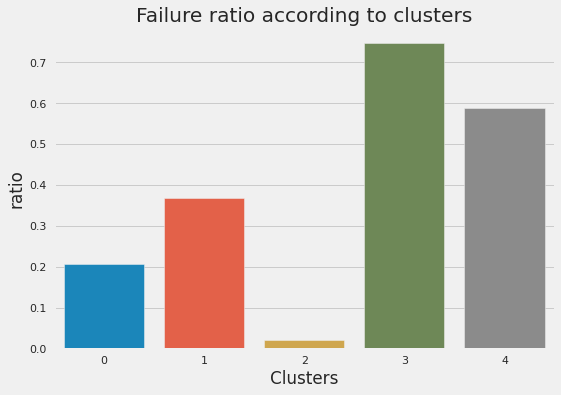

In [ ]:
# get failing ratio according to clusters
new_kmeans = kmeans_model5.copy()
new_kmeans["Machine_failure"] = df_fails
def c_ratio(df):
  no_fail = sum(df['Machine_failure']==0)
  fail = sum(df['Machine_failure']==1)
  return fail/(fail+no_fail)
new_kmeans  = new_kmeans.groupby("Clusters").apply(c_ratio).reset_index(name="ratio")
sns.barplot(data=new_kmeans,x="Clusters",y="ratio")
plt.title("Failure ratio according to clusters")   

## K Means analysis of clusters
In this section we will narrow down machine failure to various types of failure using the boxplots plotted.

cluster 0: This cluster's features are very close to 0. The machine failure rate of this cluster is around 20%, which is considered quite low among clusters.

cluster 1: This cluster has the lowest mean of air temperature and process temeprature, and the highest mean of tool wear among all clusters. The machine failure rate of this cluster is around 40% and can be classified as low heat or tool wear failure.

 
cluster 2: All features of this cluster are around the mean of all the clusters' features. It is also shown that machines of this cluster has the lowest chance of failing.

cluster 3: This cluster has very high rotational speed and very low torque. It is not suprising that machines in cluster 3 has the highest chance of failing. This cluster can be categorized as rotational failure.

cluster 4: This cluster has the highest mean of air temperature, process temperature and torque. This cluster also has a high failure rate and can be categorized as overheat failure.

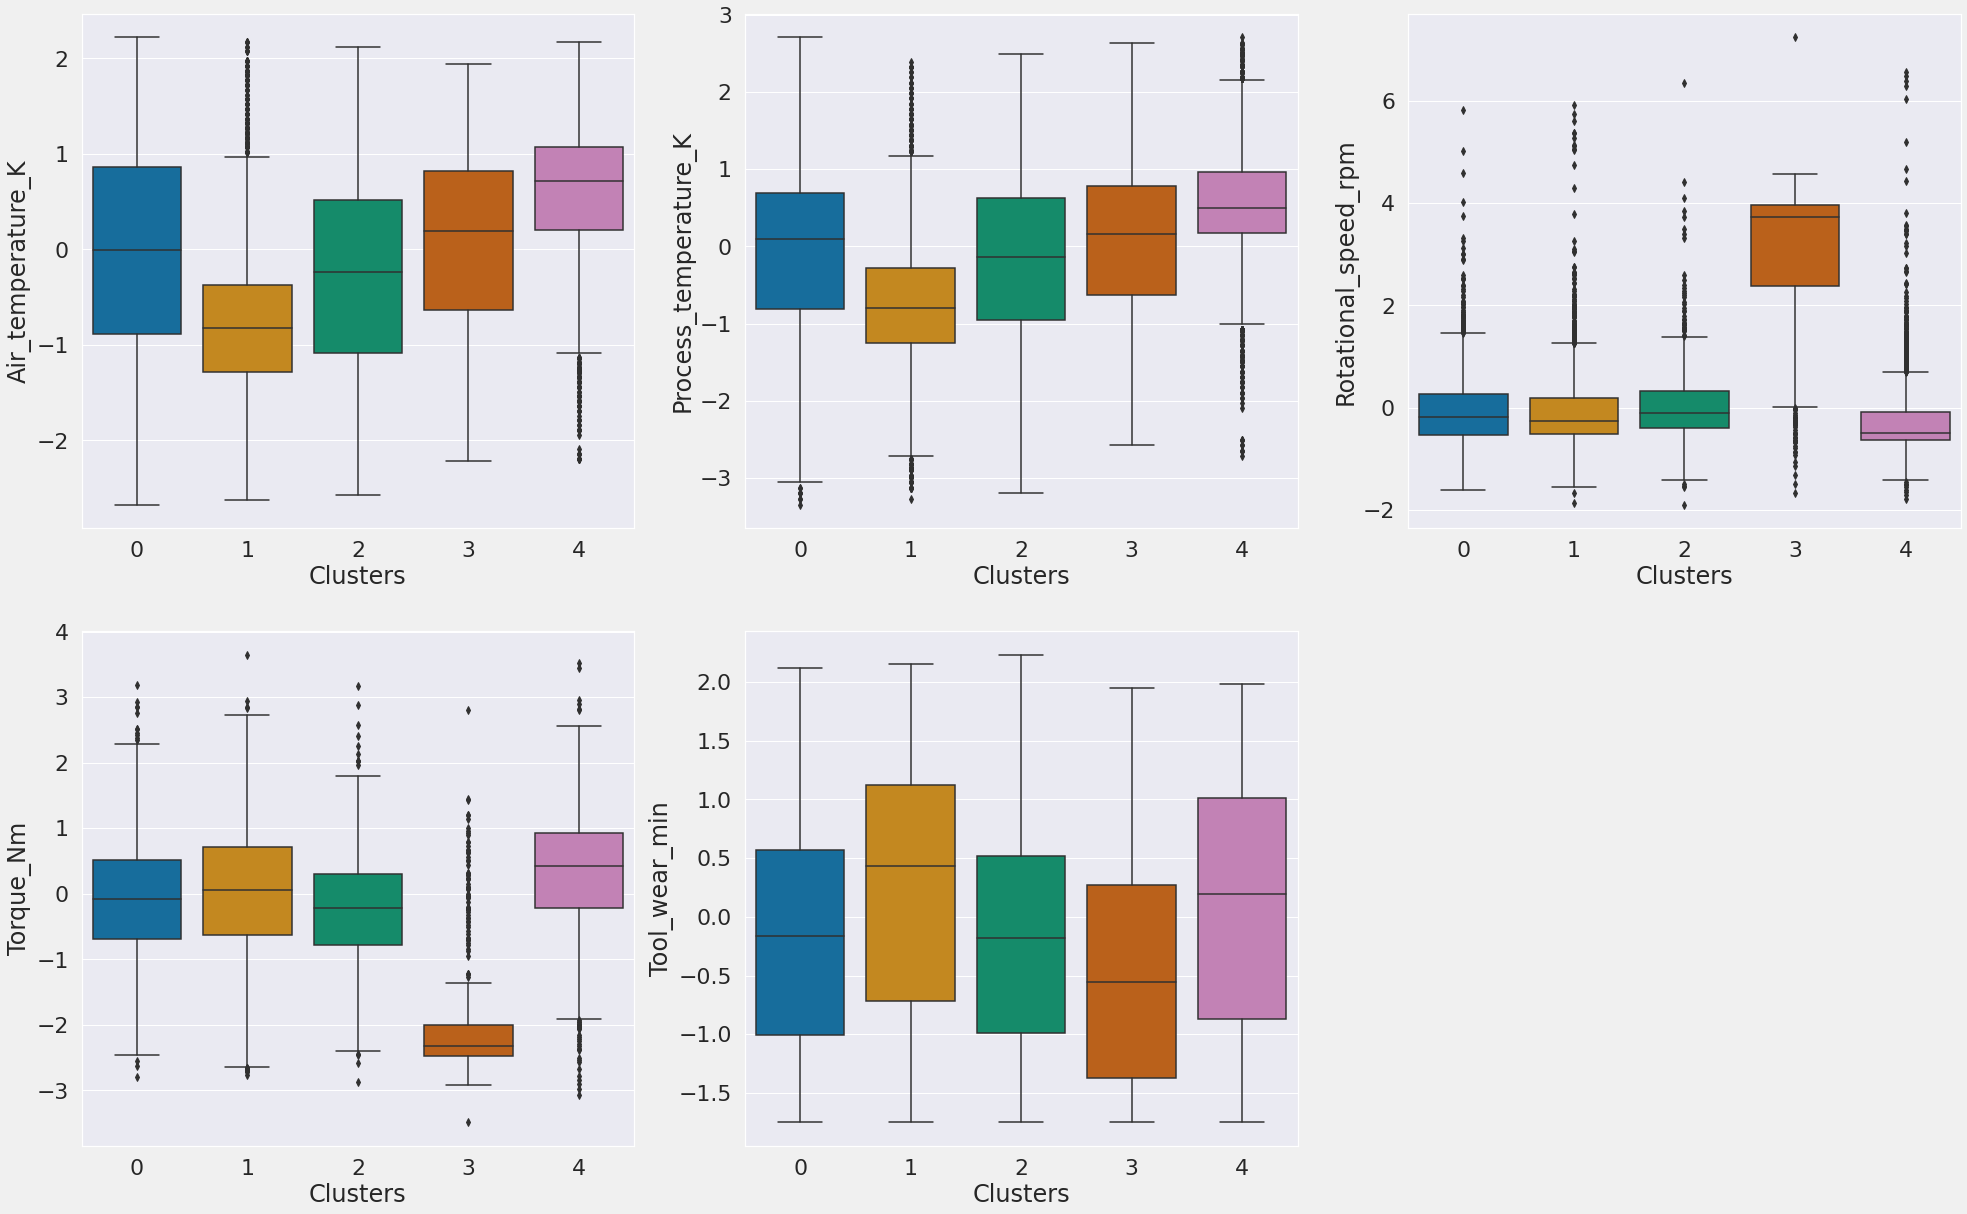

In [ ]:
# plot the boxplots of features of clusters
plot_boxplots(kmeans_model5.drop(columns=['Type_H', 'Type_L','Type_M'])) 

In [ ]:
# high:3
# medium:2
# # low:1
# ordinal encoding for analysis of clusters and for log reg later
X_train_ordinal = X_train.replace({'L':1, 'M':2, 'H':3})
X_test_ordinal = X_test.replace({'L':1, 'M':2, 'H':3})

In [ ]:
df_ordinal = concatentate_df(X_train_ordinal, y_train, X_test_ordinal, y_test)

df_clusters = kmeans_model5.iloc[:, 8]
df_ordinal_clusters = pd.concat([df_ordinal, df_clusters], axis=1)
df_ordinal_clusters.head()

Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0     1              302.3                  311.5                  1387   
1     2              298.3                  309.5                  1543   
2     3              300.8                  311.2                  1612   
3     1              299.8                  309.3                  1299   
4     1              301.7                  310.6                  1624   

   Torque_Nm  Tool_wear_min  Machine_failure  Clusters  
0       47.3              2                0         4  
1       49.9            199                0         0  
2       32.5            143                0         2  
3       65.1            212                1         1  
4       34.5            216                0         4

In [ ]:
## create data with cluster for both one hot encoding and ordinal encoding
clusters = df_ordinal_clusters["Clusters"]
one_hot_cluster = concatentate_df(X_train_encoded,y_train,X_test_encoded,y_test)
one_hot_cluster["Cluster"] = clusters

## can use index to split as concatentate_df concat datasets accordingly
y_train_ordinal_cluster = df_ordinal_clusters.iloc[0:13530,6]
X_train_ordinal_cluster = df_ordinal_clusters.drop(columns=["Machine_failure"]).iloc[0:13530,]
y_test_ordinal_cluster = df_ordinal_clusters.iloc[13530:16530,6]
X_test_ordinal_cluster = df_ordinal_clusters.drop(columns=["Machine_failure"]).iloc[13530:16530,]

y_train_onehot_cluster = y_train
X_train_onehot_cluster = one_hot_cluster.drop(columns=["Machine_failure"]).iloc[0:13530,]
y_test_onehot_cluster = y_test
X_test_onehot_cluster = one_hot_cluster.drop(columns=["Machine_failure"]).iloc[13530:16530,]


<Figure size 360x360 with 0 Axes>

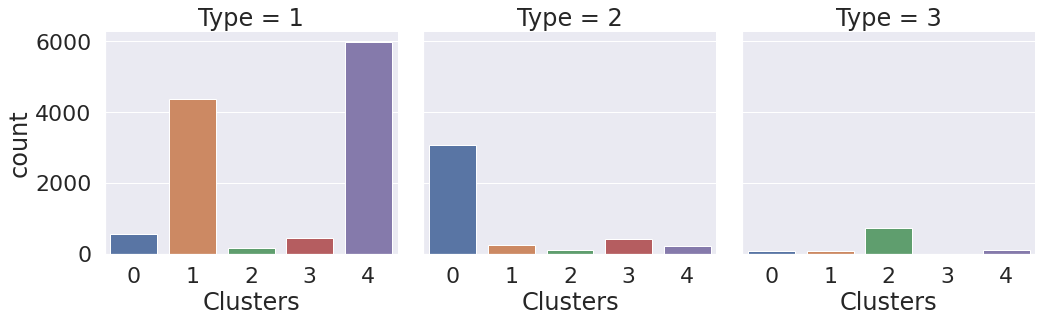

In [ ]:
# Plot distributions of clusters in each machine type
plt.figure(figsize=(5,5))
sns.catplot(data=df_ordinal_clusters, x='Clusters', kind='count', col='Type')

## K Means evaluation

### Silhouette plot
Based on the following silhouette coefficient, we can say that the data points are clustered rather appropriately.

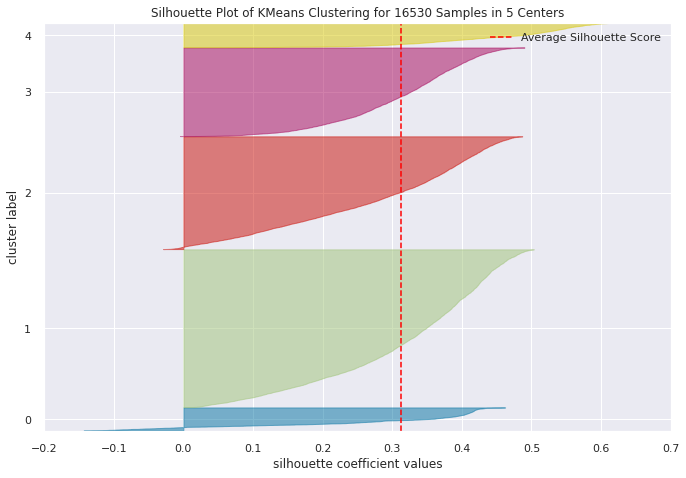

For n_clusters = 5 The average silhouette_score is: 0.31230002116264843 


In [ ]:
plot_silhouettes(df_kmeans,5)  # 5 clusters: 0.312 # 4 clusters: 0.291 #3 clusters:0.370

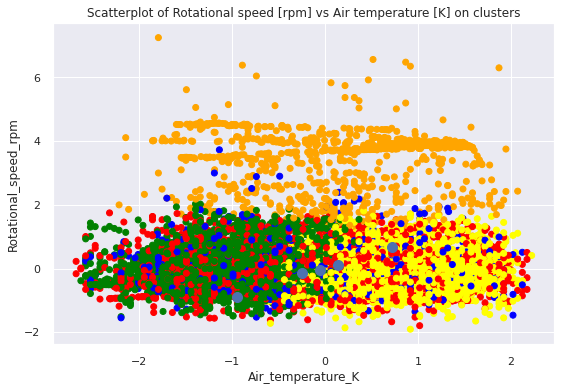

In [ ]:
colors = {0:'red', 1:'green', 2:'blue', 3:'orange', 4:'yellow'}
plt.scatter(x=kmeans_model5['Air_temperature_K'], y=kmeans_model5['Rotational_speed_rpm'], c=pd.Series(kmeans5.labels_).map(colors))
centers = kmeans5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=100);
plt.xlabel('Air_temperature_K')
plt.ylabel('Rotational_speed_rpm')
plt.title('Scatterplot of Rotational speed [rpm] vs Air temperature [K] on clusters')
plt.show()

In [ ]:
#Render a 3d graph 
fig = px.scatter_3d(kmeans_model5, x='Air_temperature_K', y='Rotational_speed_rpm', z='Tool_wear_min',
                    color='Clusters')
fig.show()

In [ ]:
data=kmeans_model5
eval = []
cols = list(data.columns)[:-1]
for c in cols:
    model = ols(c +' ~ C(Clusters)', data=data)

### N-way ANOVA
We can see that the p value for all the variables are significant, we conclude that there are differences in the means of different clusters

In [ ]:
#perform N-way ANOVA
def clustereval(data,sig):
    eval = []
    cols = list(data.columns)[:-1]
    for c in cols:
        model = ols(c +' ~ C(Clusters)', data=data).fit()
        pval = sm.stats.anova_lm(model).iloc[0,4]
        print(c + " :")
        print("P-Value : " + str(pval))
        print("Significant at "+ str(sig) +" :" + str(pval < sig))
        print()
        
clustereval(kmeans_model5,0.05)

#If it is not significant, we can drop the features and do clustering on the remaining features

Air_temperature_K :
P-Value : 0.0
Significant at 0.05 :True

Process_temperature_K :
P-Value : 0.0
Significant at 0.05 :True

Rotational_speed_rpm :
P-Value : 0.0
Significant at 0.05 :True

Torque_Nm :
P-Value : 0.0
Significant at 0.05 :True

Tool_wear_min :
P-Value : 9.293091493998127e-118
Significant at 0.05 :True

Type_H :
P-Value : 0.0
Significant at 0.05 :True

Type_L :
P-Value : 0.0
Significant at 0.05 :True

Type_M :
P-Value : 0.0
Significant at 0.05 :True



# Logistic Regression

In [ ]:
def metrics(test_data, prediction):
  cm = pd.DataFrame(confusion_matrix(test_data, prediction))
  cm.columns = ['Predicted Y=0','Predicted Y=1']
  cm.index = ['True Y=0','True Y=1']
  display(cm)

  accuracy = (cm.iloc[0,0]+cm.iloc[1,1])/(cm.iloc[0,0]+cm.iloc[1,1]+cm.iloc[0,1]+cm.iloc[1,0])
  print('Accuracy: '+str(accuracy))

  # Possible ways to further improve accuracy is to try adjusting the level of significance.

  # Calculate Sensitivity (true positive rate)
  sensitivity = cm.iloc[1, 1]/(cm.iloc[1, 1] + cm.iloc[1, 0])
  print('Sensitivity: '+ str(sensitivity))

  # Calculate Specificity (true negative rate)
  specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[0, 1])
  print('Specificity: '+str(specificity))

  #Precision
  precision = cm.iloc[1,1]/(cm.iloc[1,1]+cm.iloc[0,1])
  print('Precision: '+str(precision))

  # AUC
  print('ROC-AUC:',roc_auc_score(test_data, prediction))

  #F1 Score
  print("F1 score:", round(f1_score(test_data, prediction), 4))

In [ ]:
X_train_logreg = X_train_ordinal.copy()
X_test_logreg = X_test_ordinal.copy()
train_logreg = pd.concat([X_train_logreg, y_train], axis=1)

In [ ]:
droplist = ['Machine_failure']

def remove_name_formula(toremove):
    print(type(toremove))
    global droplist
    droplist = droplist+toremove
    newdf = train_logreg.drop(droplist,axis=1)
    predictors = "+".join(newdf.columns)
    f = 'Machine_failure ~ '+predictors
    return f

In [ ]:
categorical_variables = ['Type']
continuous_variables = ['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min']

In [ ]:
# Find Point biserial correlation
for cat_var in categorical_variables:
  for cont_var in  continuous_variables:
    data_cat = X_train_logreg[cat_var].to_numpy()
    data_cont = X_train_logreg[cont_var].to_numpy()
    
    corr, p_val = pointbiserialr(x=data_cat, y=data_cont)
    if np.abs(corr) >= 0.8:
      print(f'Categorical variable: {cat_var}, Continuous variable: {cont_var}, correlation: {corr}')

In [ ]:
# Find Pearson correlation
total_len = len(continuous_variables)
for idx1 in range(total_len-1):
  for idx2 in range(idx1+1, total_len):
    cont_var1 = continuous_variables[idx1]
    cont_var2 = continuous_variables[idx2]
    data_cont1 = X_train_logreg[cont_var1].to_numpy()
    data_cont2 = X_train_logreg[cont_var2].to_numpy()
    corr, p_val = pearsonr(x=data_cont1, y=data_cont2)
    if np.abs(corr) >= 0.8:
      print(f'Variable 1: {cont_var1}, Variable 2: {cont_var2}, correlation: {corr}')

Variable 1: Air_temperature_K, Variable 2: Process_temperature_K, correlation: 0.8589089162376845
Variable 1: Rotational_speed_rpm, Variable 2: Torque_Nm, correlation: -0.8549973737655481


Due to high collinearity between Air temperature and Process temperature, we will remove Air temperature and will check the fit for logistic regression. Similarly for Rotational speed and Torque, we will remove Rotational speed.

In [ ]:
newf = remove_name_formula(['Air_temperature_K'])
logitfit = smf.logit(formula = newf, data = train_logreg).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.420377
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Machine_failure   No. Observations:                13530
Model:                          Logit   Df Residuals:                    13524
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.3935
Time:                        17:46:17   Log-Likelihood:                -5687.7
converged:                       True   LL-Null:                       -9378.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -122.0424      5.834    -20.921      0.000    -1

In [ ]:
newf = remove_name_formula(['Rotational_speed_rpm'])
logitfit = smf.logit(formula = newf, data = train_logreg).fit()
print(logitfit.summary())

<class 'list'>
Optimization terminated successfully.
         Current function value: 0.563841
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Machine_failure   No. Observations:                13530
Model:                          Logit   Df Residuals:                    13525
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.1865
Time:                        17:46:17   Log-Likelihood:                -7628.8
converged:                       True   LL-Null:                       -9378.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -71.8597      4.672    -15.382      0.000     -

## Prediction using logistic regression

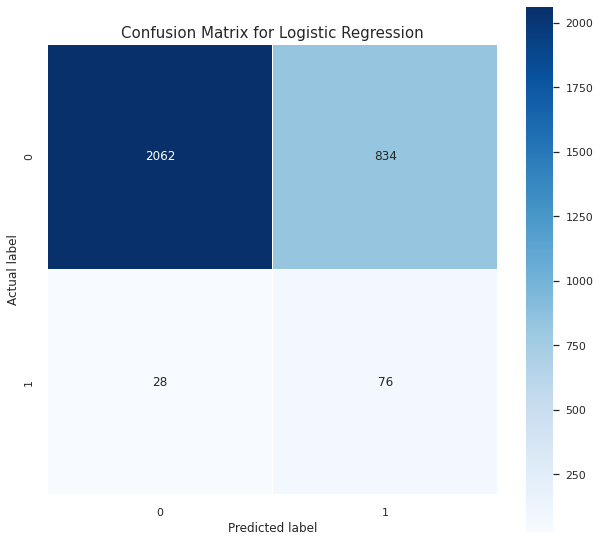

In [ ]:
y_pred = np.array(logitfit.predict(X_test_logreg) > 0.5, dtype=float) #abv 0.5 is class , below is class zero
y_true = y_test
cm = pd.DataFrame(confusion_matrix(y_true, y_pred))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Confusion Matrix for Logistic Regression"
plt.title(all_sample_title, size = 15);

In [ ]:
## check metrics
metrics(y_true,y_pred)

Predicted Y=0  Predicted Y=1
True Y=0           2062            834
True Y=1             28             76

Accuracy: 0.7126666666666667
Sensitivity: 0.7307692307692307
Specificity: 0.7120165745856354
Precision: 0.08351648351648351
ROC-AUC: 0.7213929026774331
F1 score: 0.1499


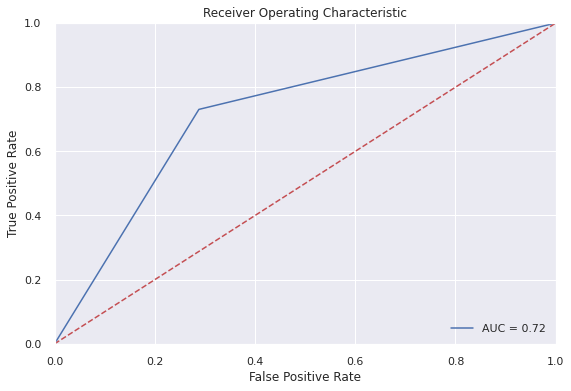

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt

In [ ]:
def feature_imp(model,training_data):
    a=dict(zip(training_data.columns, model.feature_importances_.round(3)))
    b = dict()
    for key, value in a.items():
        if value > 0 :
            b[key] = value

    return sorted(b.items(), key=lambda x: x[1],reverse=True)

In [ ]:
def find_optimal_accuracy(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = DecisionTreeClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ###
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('accuracy')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [ ]:
def find_optimal_f1(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = DecisionTreeClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(f1_score(y_test, pred))
    ###
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(f1_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('f1')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

# Decision tree ordinal with cluster

In [ ]:
X_train_decisiontree = X_train_ordinal_cluster.drop(columns=['Air_temperature_K', 'Rotational_speed_rpm'])
X_test_decisiontree = X_test_ordinal_cluster.drop(columns=['Air_temperature_K', 'Rotational_speed_rpm'])

Best max_depth for gini: 24
Best max_depth for entropy: 28


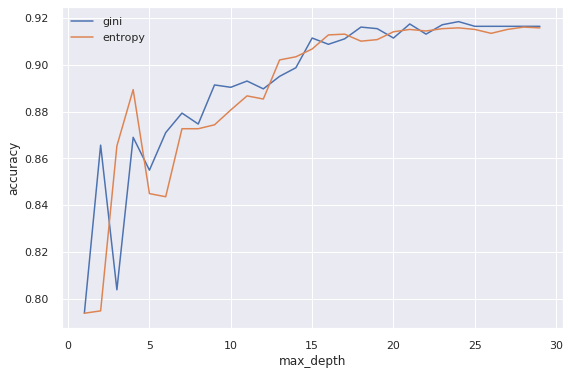

In [ ]:
find_optimal_accuracy(X_train_decisiontree,y_train_ordinal_cluster,X_test_decisiontree,y_test_ordinal_cluster,start=1,end=30,random_state=1)

Best max_depth for gini: 24
Best max_depth for entropy: 26


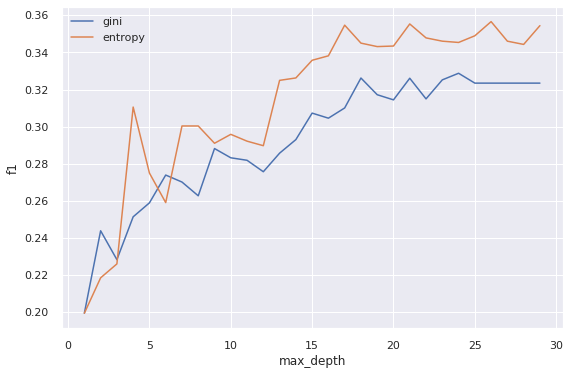

In [ ]:
find_optimal_f1(X_train_decisiontree,y_train_ordinal_cluster,X_test_decisiontree,y_test_ordinal_cluster,start=1,end=30,random_state=1)

In [ ]:
clf=DecisionTreeClassifier(max_depth=25,criterion='entropy',random_state=1)
clf.fit(X_train_decisiontree,y_train_ordinal_cluster)

DecisionTreeClassifier(criterion='entropy', max_depth=25, random_state=1)

In [ ]:
y_pred = clf.predict(X_test_decisiontree)

In [ ]:
metrics(y_test_ordinal_cluster,y_pred)

Predicted Y=0  Predicted Y=1
True Y=0           2686            210
True Y=1             37             67

Accuracy: 0.9176666666666666
Sensitivity: 0.6442307692307693
Specificity: 0.9274861878453039
Precision: 0.24187725631768953
ROC-AUC: 0.7858584785380366
F1 score: 0.3517


# Decision tree ordinal without cluster


In [ ]:
X_train_decisiontree2 = X_train_decisiontree.drop(columns=["Clusters"])
X_test_decisiontree2 = X_test_decisiontree.drop(columns=["Clusters"])

Best max_depth for gini: 27
Best max_depth for entropy: 29


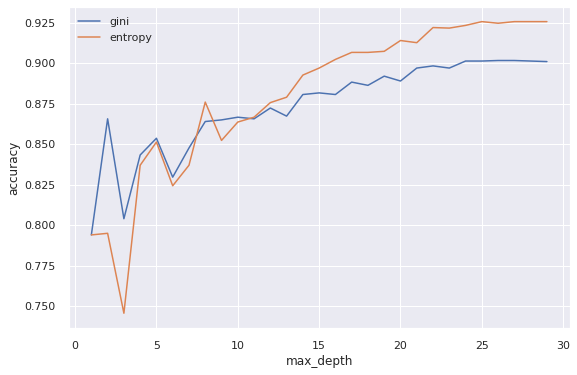

In [ ]:
find_optimal_accuracy(X_train_decisiontree2,y_train_ordinal_cluster,X_test_decisiontree2,y_test_ordinal_cluster,start=1,end=30,random_state=1)

Best max_depth for gini: 27
Best max_depth for entropy: 29


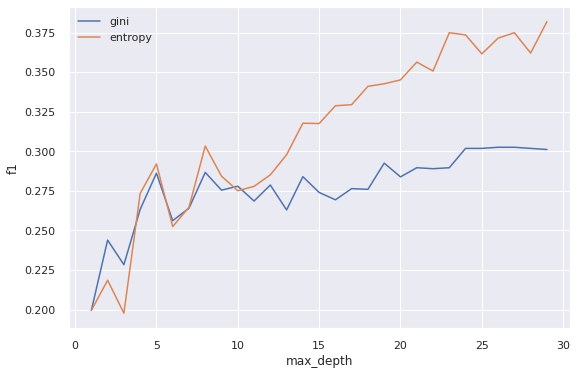

In [ ]:
find_optimal_f1(X_train_decisiontree2,y_train_ordinal_cluster,X_test_decisiontree2,y_test_ordinal_cluster,start=1,end=30,random_state=1)

In [ ]:
clf2=DecisionTreeClassifier(max_depth=27,criterion='gini',random_state=3)
clf2.fit(X_train_decisiontree2,y_train_ordinal_cluster)

DecisionTreeClassifier(max_depth=27, random_state=3)

In [ ]:
y_pred2 = clf2.predict(X_test_decisiontree2)

In [ ]:
metrics(y_test_ordinal_cluster,y_pred2)

Predicted Y=0  Predicted Y=1
True Y=0           2642            254
True Y=1             41             63

Accuracy: 0.9016666666666666
Sensitivity: 0.6057692307692307
Specificity: 0.912292817679558
Precision: 0.19873817034700317
ROC-AUC: 0.7590310242243945
F1 score: 0.2993


# Decision tree onehot with cluster


In [ ]:
X_train_decisiontree3 = X_train_onehot_cluster.drop(columns=['Air_temperature_K', 'Rotational_speed_rpm'])
X_test_decisiontree3 = X_test_onehot_cluster.drop(columns=['Air_temperature_K', 'Rotational_speed_rpm'])

Best max_depth for gini: 22
Best max_depth for entropy: 26


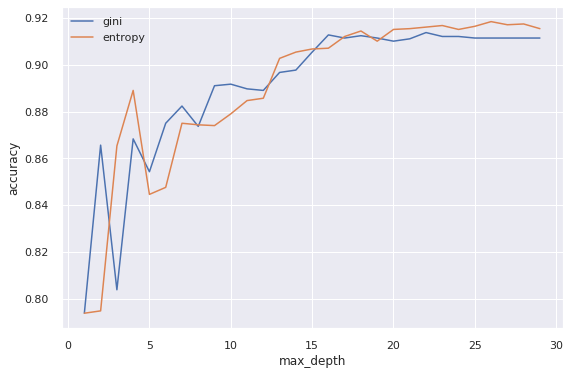

In [ ]:
find_optimal_accuracy(X_train_decisiontree3,y_train_ordinal_cluster,X_test_decisiontree3,y_test_ordinal_cluster,start=1,end=30,random_state=3)

Best max_depth for gini: 19
Best max_depth for entropy: 27


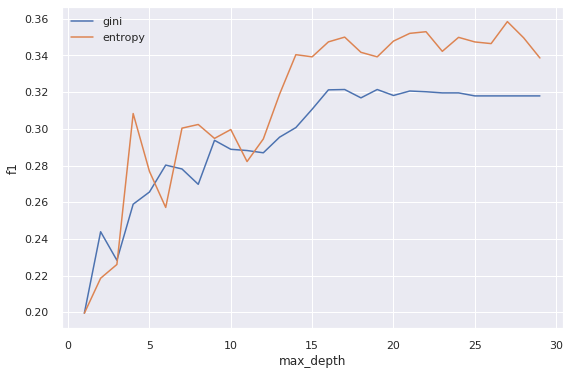

In [ ]:
find_optimal_f1(X_train_decisiontree3,y_train_ordinal_cluster,X_test_decisiontree3,y_test_ordinal_cluster,start=1,end=30,random_state=3)

In [ ]:
clf3=DecisionTreeClassifier(max_depth=27,criterion='entropy',random_state=3)
clf3.fit(X_train_decisiontree3,y_train_onehot_cluster)

DecisionTreeClassifier(criterion='entropy', max_depth=27, random_state=3)

In [ ]:
y_pred3 = clf3.predict(X_test_decisiontree3)

In [ ]:
metrics(y_test_onehot_cluster,y_pred3)

Predicted Y=0  Predicted Y=1
True Y=0           2687            209
True Y=1             39             65

Accuracy: 0.9173333333333333
Sensitivity: 0.625
Specificity: 0.9278314917127072
Precision: 0.23722627737226276
ROC-AUC: 0.7764157458563535
F1 score: 0.3439


# Decision tree onehot without cluster


In [ ]:
X_train_decisiontree4 = X_train_decisiontree3.drop(columns=["Cluster"])
X_test_decisiontree4 = X_test_decisiontree3.drop(columns=["Cluster"])


Best max_depth for gini: 26
Best max_depth for entropy: 26


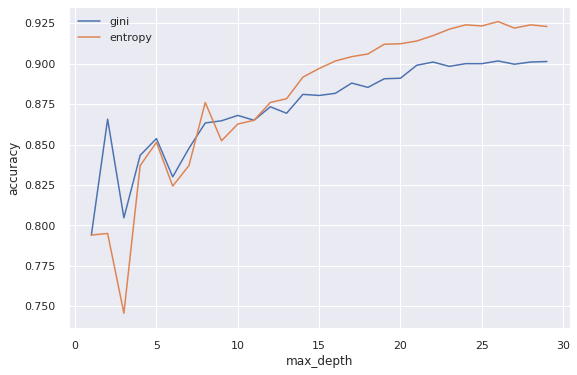

In [ ]:
find_optimal_accuracy(X_train_decisiontree4,y_train_onehot_cluster,X_test_decisiontree4,y_test_onehot_cluster,start=1,end=30,random_state=4)

Best max_depth for gini: 21
Best max_depth for entropy: 27


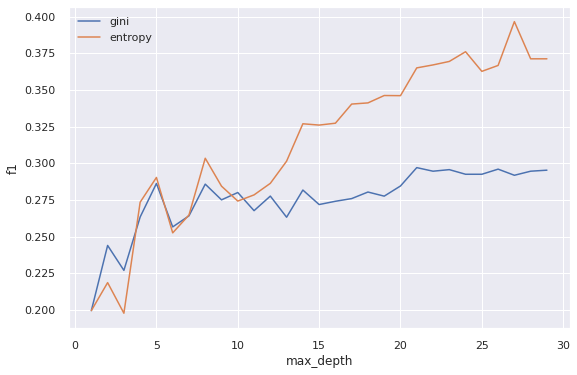

In [ ]:
find_optimal_f1(X_train_decisiontree4,y_train_onehot_cluster,X_test_decisiontree4,y_test_onehot_cluster,start=1,end=30,random_state=4)

In [ ]:
clf4=DecisionTreeClassifier(max_depth=27,criterion='entropy',random_state=4)
clf4.fit(X_train_decisiontree4,y_train_onehot_cluster)

DecisionTreeClassifier(criterion='entropy', max_depth=27, random_state=4)

In [ ]:
y_pred4 = clf4.predict(X_test_decisiontree4)

In [ ]:
metrics(y_test_onehot_cluster,y_pred4)

Predicted Y=0  Predicted Y=1
True Y=0           2706            190
True Y=1             36             68

Accuracy: 0.9246666666666666
Sensitivity: 0.6538461538461539
Specificity: 0.9343922651933702
Precision: 0.26356589147286824
ROC-AUC: 0.7941192095197619
F1 score: 0.3757


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def forest_find_optimal_accuracy(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('accuracy')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [ ]:
def forest_find_optimal_f1(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_gini.append(f1_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train)
    pred = dtree.predict(x_test)
    acc_entropy.append(f1_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('f1')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

# Random Forest ordinal with cluster

In [ ]:
X_train_forest = X_train_decisiontree.copy()
X_test_forest = X_test_decisiontree.copy()

Best max_depth for gini: 28
Best max_depth for entropy: 28


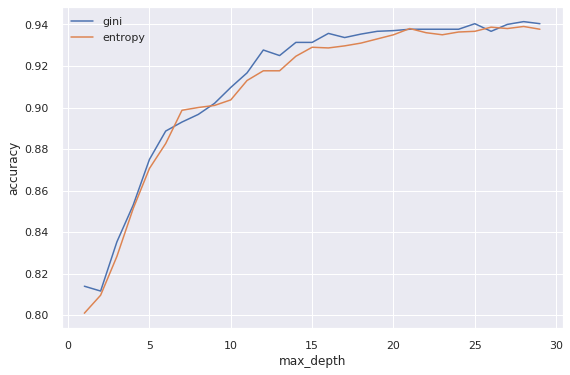

In [ ]:
forest_find_optimal_accuracy(X_train_forest,y_train_ordinal_cluster,X_test_forest,y_test_ordinal_cluster,start=1,end=30,random_state=1)

Best max_depth for gini: 28
Best max_depth for entropy: 28


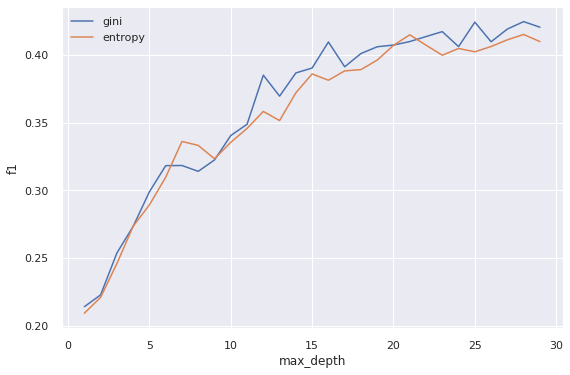

In [ ]:
forest_find_optimal_f1(X_train_forest,y_train_ordinal_cluster,X_test_forest,y_test_ordinal_cluster,start=1,end=30,random_state=1)

In [ ]:
forest1 = RandomForestClassifier(n_estimators=100, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=28,
                                  criterion='gini',random_state=1)
forest1.fit(X_train_forest,y_train_ordinal_cluster)


RandomForestClassifier(max_depth=28, max_features='sqrt', random_state=1)

In [ ]:
forest_y_pred1 = forest1.predict(X_test_forest)

In [ ]:
metrics(y_test_ordinal_cluster,forest_y_pred1)

Predicted Y=0  Predicted Y=1
True Y=0           2759            137
True Y=1             39             65

Accuracy: 0.9413333333333334
Sensitivity: 0.625
Specificity: 0.9526933701657458
Precision: 0.3217821782178218
ROC-AUC: 0.7888466850828729
F1 score: 0.4248


# Random Forest ordinal without cluster

In [ ]:
X_train_forest2 = X_train_forest.drop(columns=['Clusters'])
X_test_forest2 = X_test_forest.drop(columns=['Clusters'])

Best max_depth for gini: 23
Best max_depth for entropy: 29


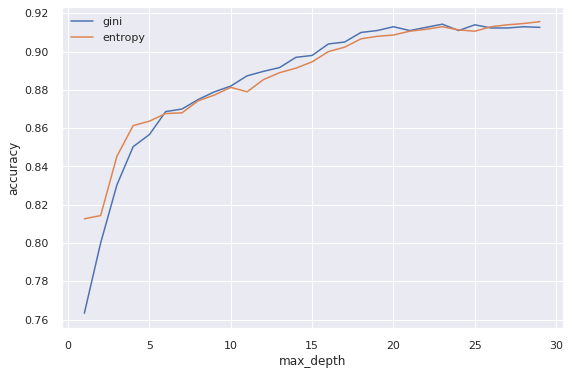

In [ ]:
forest_find_optimal_accuracy(X_train_forest2,y_train_ordinal_cluster,X_test_forest2,y_test_ordinal_cluster,start=1,end=30,random_state=2)

Best max_depth for gini: 23
Best max_depth for entropy: 29


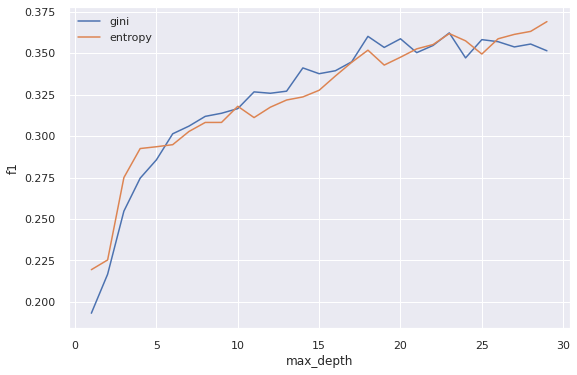

In [ ]:
forest_find_optimal_f1(X_train_forest2,y_train_ordinal_cluster,X_test_forest2,y_test_ordinal_cluster,start=1,end=30,random_state=2)

In [ ]:
forest2 = RandomForestClassifier(n_estimators=100, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=29,
                                  criterion='entropy',random_state=2)
forest2.fit(X_train_forest2,y_train_ordinal_cluster)

RandomForestClassifier(criterion='entropy', max_depth=29, max_features='sqrt',
                       random_state=2)

In [ ]:
forest_y_pred2 = forest2.predict(X_test_forest2)

In [ ]:
metrics(y_test_ordinal_cluster,forest_y_pred2)

Predicted Y=0  Predicted Y=1
True Y=0           2673            223
True Y=1             30             74

Accuracy: 0.9156666666666666
Sensitivity: 0.7115384615384616
Specificity: 0.9229972375690608
Precision: 0.24915824915824916
ROC-AUC: 0.8172678495537612
F1 score: 0.3691


# Random Forests onehot with cluster

In [ ]:
X_train_forest3 = X_train_decisiontree3.copy()
X_test_forest3 = X_test_decisiontree3.copy()

Best max_depth for gini: 22
Best max_depth for entropy: 24


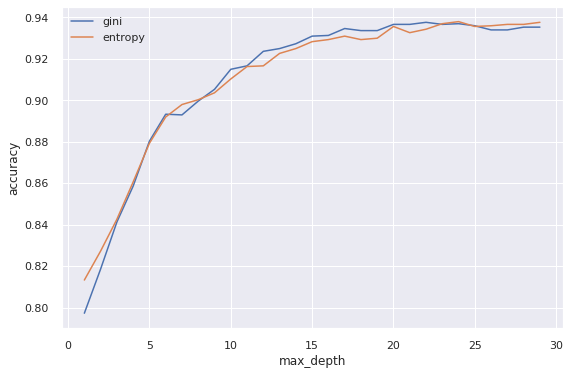

In [ ]:
forest_find_optimal_accuracy(X_train_forest3,y_train_onehot_cluster,X_test_forest3,y_test_onehot_cluster,start=1,end=30,random_state=3)

Best max_depth for gini: 24
Best max_depth for entropy: 24


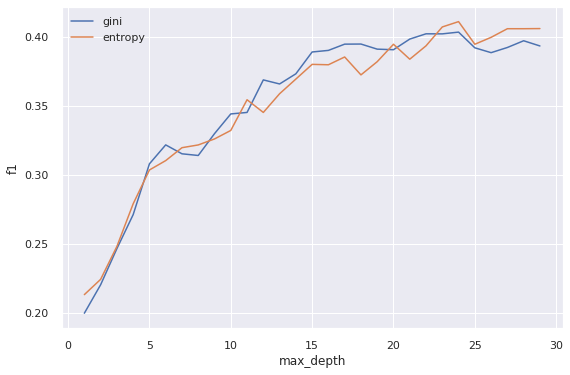

In [ ]:
forest_find_optimal_f1(X_train_forest3,y_train_onehot_cluster,X_test_forest3,y_test_onehot_cluster,start=1,end=30,random_state=3)

In [ ]:
forest3 = RandomForestClassifier(n_estimators=100, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=24,
                                  criterion='entropy',random_state=3)
forest3.fit(X_train_forest3,y_train_onehot_cluster)

RandomForestClassifier(criterion='entropy', max_depth=24, max_features='sqrt',
                       random_state=3)

In [ ]:
forest_y_pred3 = forest3.predict(X_test_forest3)

In [ ]:
metrics(y_test_onehot_cluster,forest_y_pred3)

Predicted Y=0  Predicted Y=1
True Y=0           2749            147
True Y=1             39             65

Accuracy: 0.938
Sensitivity: 0.625
Specificity: 0.9492403314917127
Precision: 0.30660377358490565
ROC-AUC: 0.7871201657458564
F1 score: 0.4114


# Random Forest onehot without cluster

In [ ]:
X_train_forest4 = X_train_forest3.drop(columns=['Cluster'])
X_test_forest4 = X_test_forest3.drop(columns=['Cluster'])

Best max_depth for gini: 20
Best max_depth for entropy: 29


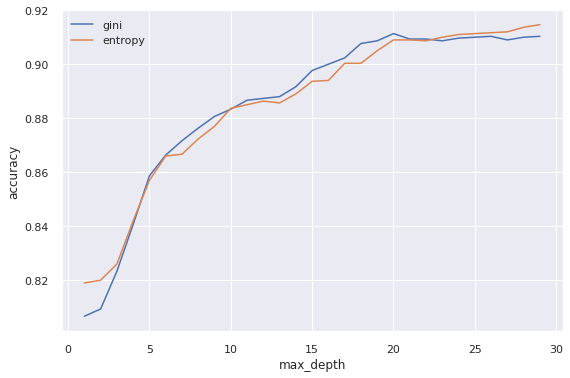

In [ ]:
forest_find_optimal_accuracy(X_train_forest4,y_train_onehot_cluster,X_test_forest4,y_test_onehot_cluster,start=1,end=30,random_state=4)

Best max_depth for gini: 20
Best max_depth for entropy: 29


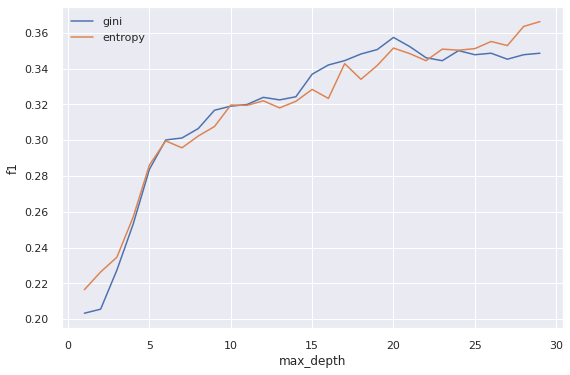

In [ ]:
forest_find_optimal_f1(X_train_forest4,y_train_onehot_cluster,X_test_forest4,y_test_onehot_cluster,start=1,end=30,random_state=4)

In [ ]:
forest4 = RandomForestClassifier(n_estimators=100, 
                                  bootstrap = True,
                                  max_features = 'sqrt',
                                  max_depth=29,
                                  criterion='entropy',random_state=4)
forest4.fit(X_train_forest4,y_train_onehot_cluster)

RandomForestClassifier(criterion='entropy', max_depth=29, max_features='sqrt',
                       random_state=4)

In [ ]:
forest_y_pred4 = forest4.predict(X_test_forest4)

In [ ]:
metrics(y_test_onehot_cluster,forest_y_pred4)

Predicted Y=0  Predicted Y=1
True Y=0           2670            226
True Y=1             30             74

Accuracy: 0.9146666666666666
Sensitivity: 0.7115384615384616
Specificity: 0.9219613259668509
Precision: 0.24666666666666667
ROC-AUC: 0.8167498937526563
F1 score: 0.3663


# XG Boost

In [ ]:
!pip install xgboost==0.90

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# XG Boost ordinal without cluster

In [ ]:
X_train_xg = X_train_forest2.copy()
X_test_xg = X_test_forest2.copy()

In [ ]:
xgb1 = XGBClassifier(random_state=11)
xgb1 = xgb1.fit(X_train_xg,y_train_ordinal_cluster)

In [ ]:
xgb1_pred = xgb1.predict(X_test_xg)

In [ ]:
metrics(y_test_ordinal_cluster,xgb1_pred)

Predicted Y=0  Predicted Y=1
True Y=0           2517            379
True Y=1             18             86

Accuracy: 0.8676666666666667
Sensitivity: 0.8269230769230769
Specificity: 0.8691298342541437
Precision: 0.18494623655913978
ROC-AUC: 0.8480264555886102
F1 score: 0.3023


In [ ]:
xgb_fea_imp=pd.DataFrame(list(xgb1.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False).reset_index().drop(columns=['index'])
print(xgb_fea_imp)

                 feature  importance
0              Torque_Nm         240
1  Process_temperature_K         178
2          Tool_wear_min         158
3                   Type          61


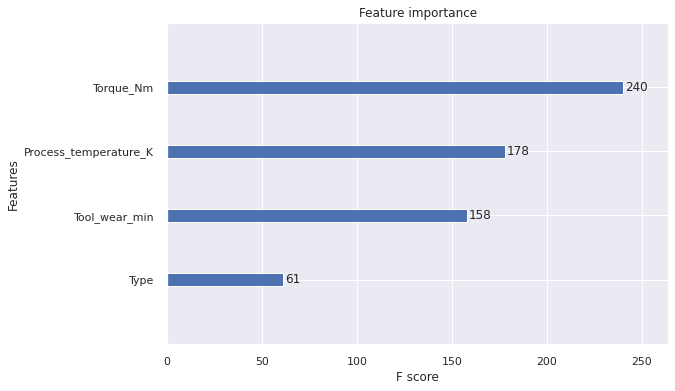

In [ ]:
plot_importance(xgb1, importance_type = 'weight')
plt.show()

In [ ]:
from xgboost import plot_tree

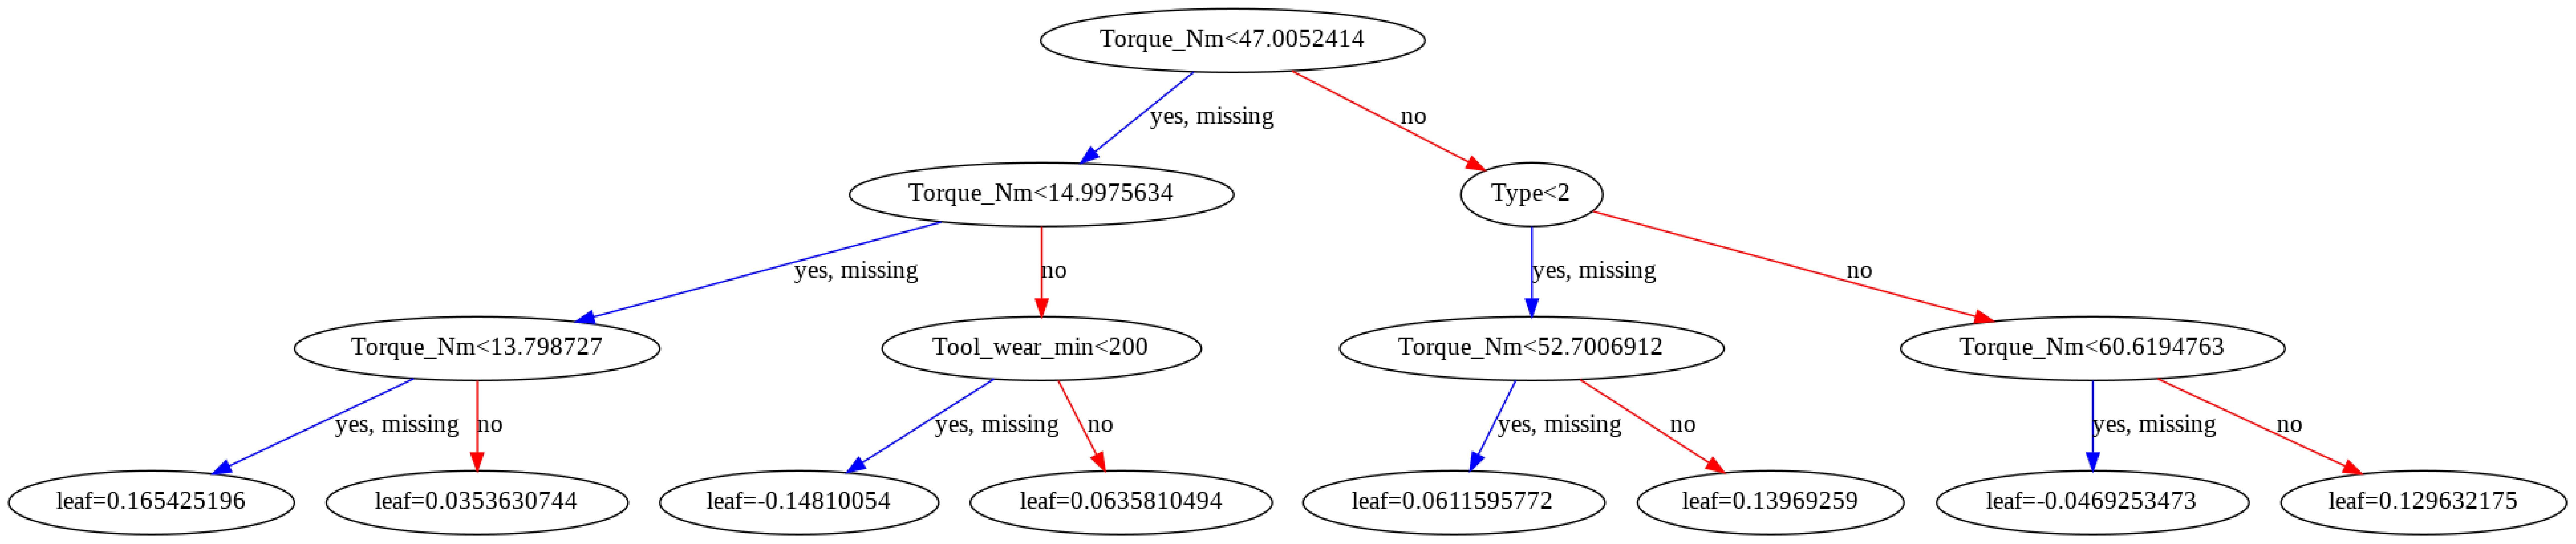

In [ ]:
plot_tree(xgb1,num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

# XG Boost ordinal with cluster

In [ ]:
X_train_xg2 = X_train_forest.copy()
X_test_xg2 = X_test_forest.copy()

In [ ]:
xgb2 = XGBClassifier(random_state=12)
xgb2 = xgb2.fit(X_train_xg2,y_train_ordinal_cluster)

In [ ]:
xgb2_pred = xgb2.predict(X_test_xg2)

In [ ]:
metrics(y_test_ordinal_cluster,xgb2_pred)

Predicted Y=0  Predicted Y=1
True Y=0           2550            346
True Y=1             15             89

Accuracy: 0.8796666666666667
Sensitivity: 0.8557692307692307
Specificity: 0.880524861878453
Precision: 0.2045977011494253
ROC-AUC: 0.868147046323842
F1 score: 0.3302


In [ ]:
xgb_fea_imp=pd.DataFrame(list(xgb2.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False).reset_index().drop(columns=['index'])
print(xgb_fea_imp)

                 feature  importance
0              Torque_Nm         235
1  Process_temperature_K         164
2          Tool_wear_min         152
3                   Type          58
4               Clusters          27


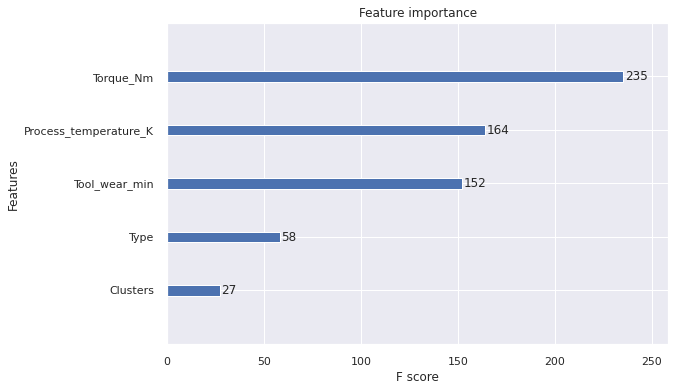

In [ ]:
plot_importance(xgb2, importance_type = 'weight')
plt.show()